In [2]:
import spacy
from spacy.tokenizer import Tokenizer

In [3]:
import en_core_web_lg
nlp = en_core_web_lg.load()

stop_list = list(nlp.Defaults.stop_words)
print("the number of stop words: ", len(stop_list))
print("The first 10 stop words are: ", stop_list[:10])

the number of stop words:  326
The first 10 stop words are:  ['make', 'never', 'your', 'again', 'nor', 'less', 'top', 'yours', 'via', 'himself']


In [4]:
# Open and save the raw files
with open('wonderland.txt',encoding='utf-8',errors='ignore') as f:
    wonder_raw = f.read()

In [5]:
# Parse the raw text
doc = nlp(wonder_raw)
print('The type of output is: ', type(doc))
print(doc[:100])

The type of output is:  <class 'spacy.tokens.doc.Doc'>
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?” So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure


In [6]:
# Remove the stop words and the punctuation

# Initialize a list to hold the tokens
tokens_nostop = []

# Loop over each token in the document (doc)
for token in doc:
    if (token.is_stop == False) & (token.is_punct == False):
        tokens_nostop.append(token.text.lower())

print(tokens_nostop[:50])

['alice', 'beginning', 'tired', 'sitting', 'sister', 'bank', 'having', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'pictures', 'conversations', 'considering', 'mind', 'hot', 'day', 'feel', 'sleepy', 'stupid', 'pleasure']


In [7]:
from collections import Counter
import pandas as pd

# Sum up the word counts and store into a dict
tokens_dict = Counter(tokens_nostop)

# Convert to a DataFrame
tokens_wc = pd.DataFrame(list(tokens_dict.items()), columns = ['word','count'])

# Rank the words by how frequently they occur
tokens_wc['rank'] = tokens_wc['count'].rank(method='first',ascending=False)

# Count all of the words in the document and calculate their percentage
total = tokens_wc['count'].sum()
tokens_wc['pct_total'] = tokens_wc['count'].apply(lambda x: (x/total)*100)

# Take a look at the DataFrame with new results
tokens_wc.head(10)

,word,count,rank,pct_total
0,alice,2,1.0,7.142857
1,beginning,1,6.0,3.571429
2,tired,1,7.0,3.571429
3,sitting,1,8.0,3.571429
4,sister,2,2.0,7.142857
5,bank,1,9.0,3.571429
6,having,1,10.0,3.571429
7,twice,1,11.0,3.571429
8,peeped,1,12.0,3.571429
9,book,2,3.0,7.142857


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

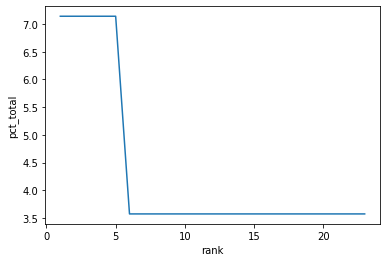

In [9]:
tokens_wc_top25 = tokens_wc[tokens_wc['rank'] <= 25]
sns.lineplot(x='rank',y='pct_total',data=tokens_wc_top25);

In [11]:
import squarify

(0.0, 100.0, 0.0, 100.0)

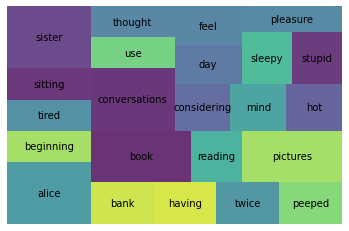

In [13]:
squarify.plot(sizes=tokens_wc_top25['pct_total'], label=tokens_wc_top25['word'],alpha=.8)
plt.axis('off')

In [14]:
STOP_WORDS = nlp.Defaults.stop_words.union(['alice','rabbit'])